In [1]:
import cv2
import numpy as np
from scipy.stats import skew

In [2]:
# --- Load image ---
image_path = "Cropped_Images/0 hr/ pH5 Hydrolytic/cropped_IMG00158.JPG"  
image = cv2.imread(image_path)

(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

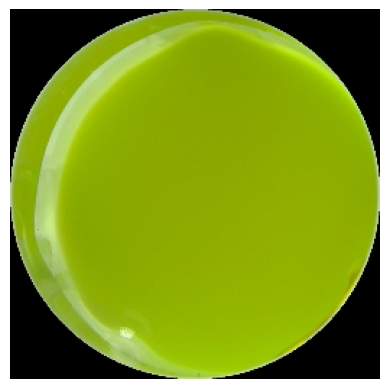

In [9]:
image = cv2.resize(image, (256, 256))  # Resize for consistency

# Show the resized image using matplotlib
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Hide axis

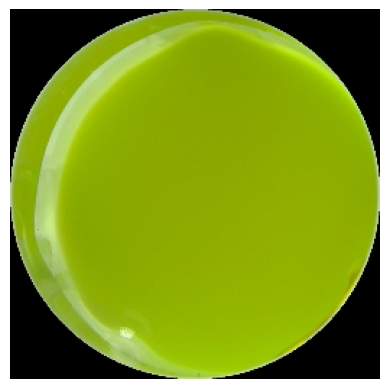

In [10]:
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Show the RGB image using matplotlib
plt.imshow(rgb_image)
plt.axis('off')  # Hide axes
plt.show()

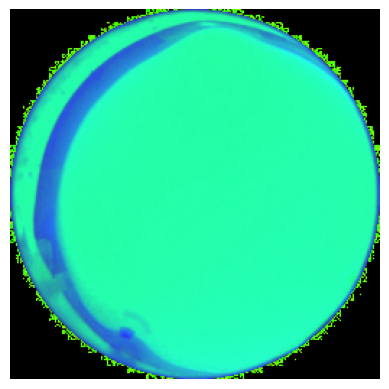

In [11]:
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Show the HSV image using matplotlib
plt.imshow(hsv_image)   
plt.axis('off')  # Hide axes
plt.show()


--- RGB Histogram Shape: (768,)


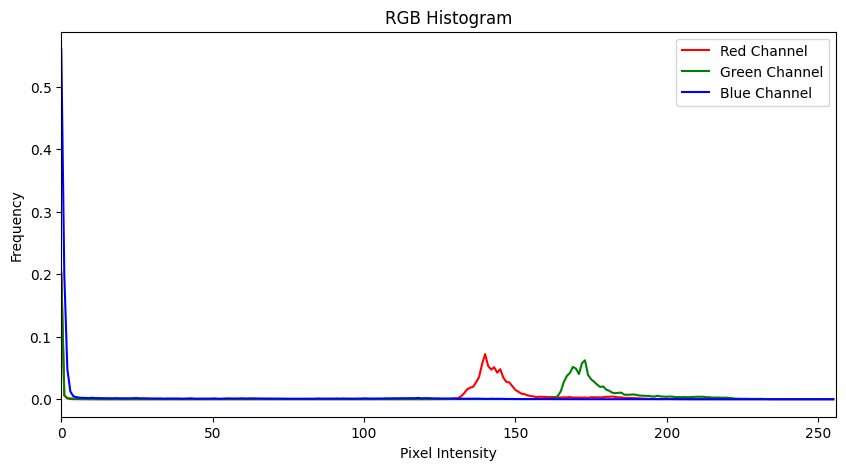

In [13]:
# --- 1. RGB Histogram ---
rgb_hist = []
for i in range(3):  # R, G, B channels
    hist = cv2.calcHist([rgb_image], [i], None, [256], [0, 256])
    hist = hist.flatten() / np.sum(hist)  # Normalize
    rgb_hist.extend(hist)

print("\n--- RGB Histogram Shape:", np.array(rgb_hist).shape)
# Plot the RGB histogram
plt.figure(figsize=(10, 5))
plt.title("RGB Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.xlim([0, 256])
plt.plot(np.arange(256), rgb_hist[:256], color='r', label='Red Channel')
plt.plot(np.arange(256), rgb_hist[256:512], color='g', label='Green Channel')
plt.plot(np.arange(256), rgb_hist[512:], color='b', label='Blue Channel')
plt.legend()
plt.show()

--- HSV Histogram Shape: (692,)


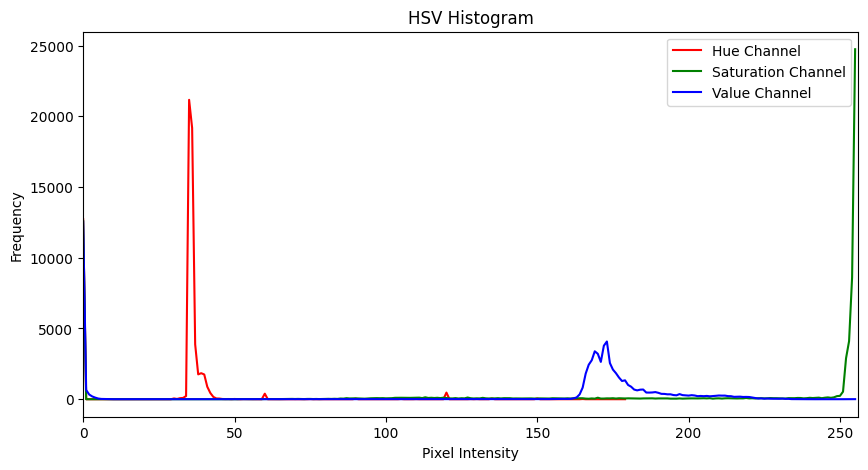

In [16]:
# --- 2. HSV Histogram ---
hsv_hist = []
# H: 180 bins, S & V: 256 bins (OpenCV ranges)
h_bins = cv2.calcHist([hsv_image], [0], None, [180], [0, 180]).flatten()
s_bins = cv2.calcHist([hsv_image], [1], None, [256], [0, 256]).flatten()
v_bins = cv2.calcHist([hsv_image], [2], None, [256], [0, 256]).flatten()

hsv_hist = np.concatenate([h_bins, s_bins, v_bins])  # Combine histograms into one array
print("--- HSV Histogram Shape:", hsv_hist.shape)

# Plot the HSV histogram
plt.figure(figsize=(10, 5))
plt.title("HSV Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency") 
plt.xlim([0, 256])
plt.plot(np.arange(180), h_bins, color='r', label='Hue Channel')  # Use red for Hue
plt.plot(np.arange(256), s_bins, color='g', label='Saturation Channel')  # Use green for Saturation
plt.plot(np.arange(256), v_bins, color='b', label='Value Channel')  # Use blue for Value
plt.legend()
plt.show()

In [ ]:
# Normalize
hsv_hist = np.concatenate([h_bins, s_bins, v_bins])
hsv_hist = hsv_hist / np.sum(hsv_hist)

--- Color Moments (R, G, B) ---
Mean:      [115.39877319 140.38890076  12.81105042]
Std Dev:   [61.16707986 74.09994614 32.46068818]
Skewness:  [-1.25633065 -1.28943986  2.70060333]


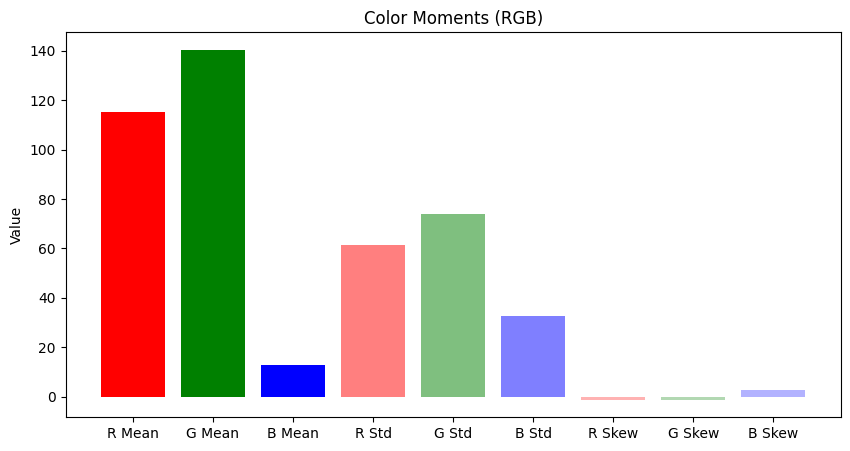

In [19]:
# --- 3. Color Moments (RGB) ---
mean = np.mean(rgb_image, axis=(0, 1))         # Mean for R, G, B
std = np.std(rgb_image, axis=(0, 1))           # Standard deviation
skw = skew(rgb_image.reshape(-1, 3), axis=0)   # Skewness per channel

color_moments = np.concatenate([mean, std, skw])

print("--- Color Moments (R, G, B) ---")
print("Mean:     ", mean)
print("Std Dev:  ", std)
print("Skewness: ", skw)

# Plot the color moments
plt.figure(figsize=(10, 5))
plt.title("Color Moments (RGB)")
plt.bar(['R Mean', 'G Mean', 'B Mean'], mean, color=['r', 'g', 'b'])
plt.bar(['R Std', 'G Std', 'B Std'], std, color=['r', 'g', 'b'], alpha=0.5)
plt.bar(['R Skew', 'G Skew', 'B Skew'], skw, color=['r', 'g', 'b'], alpha=0.3)
plt.ylabel("Value")
plt.show()

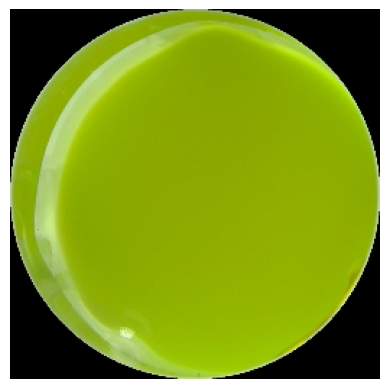

In [20]:
# Normalization of the image

normalized_image = cv2.normalize(image, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
# Show the normalized image using matplotlib
plt.imshow(cv2.cvtColor(normalized_image, cv2.COLOR_BGR2RGB))   
plt.axis('off')  # Hide axes
plt.show()

In [21]:
import cv2
import numpy as np
import os

# --- 1. Feature Extraction Function ---
def extract_features(image):
    # Convert to HSV
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # HSV Histogram (8 bins each)
    hist_h = cv2.calcHist([hsv], [0], None, [8], [0, 180])
    hist_s = cv2.calcHist([hsv], [1], None, [8], [0, 256])
    hist_v = cv2.calcHist([hsv], [2], None, [8], [0, 256])
    hist = np.concatenate([hist_h, hist_s, hist_v]).flatten()

    # Normalize histogram
    hist /= np.sum(hist)

    # RGB Color Moments
    mean = np.mean(image, axis=(0, 1))
    std = np.std(image, axis=(0, 1))
    skewness = np.mean(((image - mean) / (std + 1e-6)) ** 3, axis=(0, 1))

    moments = np.concatenate([mean, std, skewness])

    # Combine histogram and moments
    return np.concatenate([hist, moments])

# --- 2. Load a single image ---
image_path = "Cropped_Images/0 hr/ pH5 Hydrolytic/cropped_IMG00158.JPG"  
image = cv2.imread(image_path)
image = cv2.resize(image, (64, 64))

# --- 3. Extract features ---
features = extract_features(image)

# --- 4. Print output ---
print("Extracted Feature Vector Shape:", features.shape)
print("Feature Vector:\n", features)


Extracted Feature Vector Shape: (33,)
Feature Vector:
 [ 6.48600236e-02  2.63020843e-01  3.41796875e-03  8.13802108e-05
  3.25520843e-04  1.30208337e-03  3.25520843e-04  0.00000000e+00
  6.39648438e-02  1.22070312e-03  5.69661474e-03  1.39973955e-02
  1.00911455e-02  9.19596385e-03  9.52148438e-03  2.19645187e-01
  7.02311173e-02  2.44140625e-04  3.25520843e-04  4.06901032e-04
  8.13802064e-04  2.20458984e-01  3.87369804e-02  2.11588549e-03
  1.31491699e+01  1.40818359e+02  1.15779541e+02  3.30001326e+01
  7.38520990e+01  6.09758732e+01  2.66355345e+00 -1.30059546e+00
 -1.26634864e+00]


In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import OneHotEncoder

# --- CONFIGURATION ---
USE_ONE_HOT_TIME = True  # Set to True to use one-hot time bins instead of normalized time

# --- 1. Feature Extraction ---
def extract_features(image):
    # Convert to HSV
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Color histogram (HSV)
    hist_h = cv2.calcHist([hsv], [0], None, [8], [0, 180])
    hist_s = cv2.calcHist([hsv], [1], None, [8], [0, 256])
    hist_v = cv2.calcHist([hsv], [2], None, [8], [0, 256])
    hist = np.concatenate([hist_h, hist_s, hist_v]).flatten()
    hist /= np.sum(hist)  # Normalize

    # Color moments (RGB)
    mean = np.mean(image, axis=(0, 1))
    std = np.std(image, axis=(0, 1))
    skewness = np.mean(((image - mean) / (std + 1e-6)) ** 3, axis=(0, 1))
    moments = np.concatenate([mean, std, skewness])

    return np.concatenate([hist, moments])


# --- 2. Load Images and Metadata ---
def load_images_from_folder(folder_path, max_time=140):
    X, y = [], []
    label_set = set()
    time_values = []
    time_bins = []

    # Collect label names
    for time_folder in os.listdir(folder_path):
        time_path = os.path.join(folder_path, time_folder)
        if not os.path.isdir(time_path): continue
        for condition_folder in os.listdir(time_path):
            label_set.add(condition_folder)

    label_map = {label: idx for idx, label in enumerate(sorted(label_set))}

    # Collect data
    for time_folder in os.listdir(folder_path):
        time_path = os.path.join(folder_path, time_folder)
        if not os.path.isdir(time_path): continue

        # Extract numeric time (e.g., '25 hr' -> 25)
        try:
            time_value = int(time_folder.split()[0])
        except:
            continue

        normalized_time = time_value / max_time  # e.g., 25/140
        time_bin = time_value // 25  # e.g., 0–5 bins if desired

        for condition_folder in os.listdir(time_path):
            condition_path = os.path.join(time_path, condition_folder)
            if not os.path.isdir(condition_path): continue

            # Extract pH value from condition name (e.g., 'pH5 Enzymatic')
            try:
                pH = int(condition_folder.split()[0][2:])
            except:
                pH = 0  # fallback if parsing fails

            for filename in os.listdir(condition_path):
                img_path = os.path.join(condition_path, filename)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.resize(img, (64, 64))
                    image_features = extract_features(img)

                    # --- Combine features ---
                    if USE_ONE_HOT_TIME:
                        time_bins.append(time_bin)
                        time_values.append((image_features, pH, condition_folder))
                    else:
                        features = np.concatenate([image_features, [normalized_time, pH]])
                        X.append(features)
                        y.append(label_map[condition_folder])

    # Handle one-hot encoding after collection
    if USE_ONE_HOT_TIME:
        enc = OneHotEncoder(sparse_output=False)
        one_hot_times = enc.fit_transform(np.array(time_bins).reshape(-1, 1))
        for i, (image_features, pH, label) in enumerate(time_values):
            combined = np.concatenate([image_features, one_hot_times[i], [pH]])
            X.append(combined)
            y.append(label_map[label])

    return np.array(X), np.array(y), label_map


# --- 3. Train and Evaluate ---
def train_and_evaluate(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    models = {
        "KNN": KNeighborsClassifier(n_neighbors=3)
        # "SVM": SVC(kernel='rbf'),
        # "MLP": MLPClassifier(hidden_layer_sizes=(100,), max_iter=500)
    }

    for name, model in models.items():
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        acc = accuracy_score(y_test, preds)
        print(f"\nModel: {name}")
        print("Accuracy:", acc)
        print(classification_report(y_test, preds))


# --- 4. Main ---
if __name__ == "__main__":
    folder_path = "Cropped_Images"  # Replace with your dataset folder
    X, y, label_map = load_images_from_folder(folder_path)
    print("Data loaded:", X.shape)
    train_and_evaluate(X, y)

Data loaded: (590, 40)

Model: KNN
Accuracy: 0.5677966101694916
              precision    recall  f1-score   support

           1       0.79      0.96      0.87        24
           2       0.53      0.80      0.64        10
           3       0.37      0.50      0.42        14
           4       0.73      0.89      0.80         9
           5       0.00      0.00      0.00         0
           6       0.26      0.38      0.31        13
           7       0.44      0.24      0.31        17
           8       0.67      0.44      0.53         9
           9       1.00      0.40      0.57        20
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         2

    accuracy                           0.57       118
   macro avg       0.44      0.42      0.41       118
weighted avg       0.62      0.57      0.56       118



/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_pr

Data loaded: (581, 40)

Model: KNN
Accuracy: 0.5982905982905983
              precision    recall  f1-score   support

           0       0.67      0.90      0.77        20
           1       0.58      0.88      0.70         8
           2       0.50      0.55      0.52        20
           3       0.67      0.80      0.73        10
           4       0.40      0.89      0.55         9
           5       0.75      0.16      0.26        19
           6       0.71      0.62      0.67        16
           7       0.83      0.33      0.48        15

    accuracy                           0.60       117
   macro avg       0.64      0.64      0.58       117
weighted avg       0.65      0.60      0.57       117



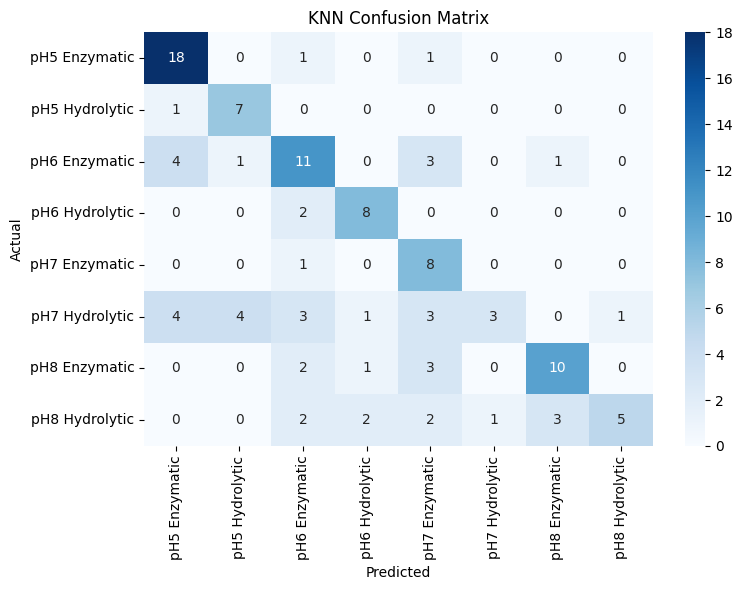


Model: Random Forest
Accuracy: 0.8974358974358975
              precision    recall  f1-score   support

           0       0.95      0.90      0.92        20
           1       1.00      1.00      1.00         8
           2       0.89      0.85      0.87        20
           3       0.91      1.00      0.95        10
           4       0.53      0.89      0.67         9
           5       0.93      0.68      0.79        19
           6       1.00      1.00      1.00        16
           7       1.00      1.00      1.00        15

    accuracy                           0.90       117
   macro avg       0.90      0.92      0.90       117
weighted avg       0.92      0.90      0.90       117



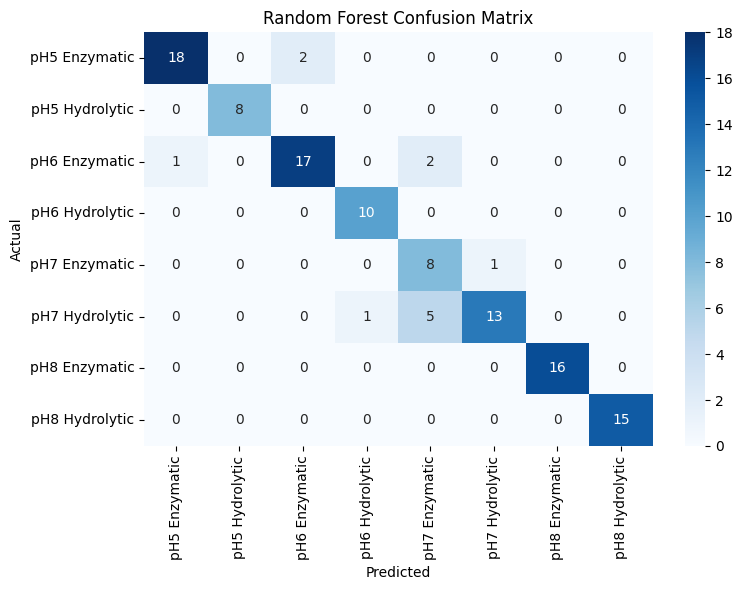

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# --- CONFIGURATION ---
USE_ONE_HOT_TIME = True  # Set to True to use one-hot time bins instead of normalized time

# --- 1. Feature Extraction ---
def extract_features(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    hist_h = cv2.calcHist([hsv], [0], None, [8], [0, 180])
    hist_s = cv2.calcHist([hsv], [1], None, [8], [0, 256])
    hist_v = cv2.calcHist([hsv], [2], None, [8], [0, 256])
    hist = np.concatenate([hist_h, hist_s, hist_v]).flatten()
    hist /= np.sum(hist)

    mean = np.mean(image, axis=(0, 1))
    std = np.std(image, axis=(0, 1))
    skewness = np.mean(((image - mean) / (std + 1e-6)) ** 3, axis=(0, 1))
    moments = np.concatenate([mean, std, skewness])

    return np.concatenate([hist, moments])


# --- 2. Load Images and Metadata ---
def load_images_from_folder(folder_path, max_time=140):
    X, y = [], []
    label_set = set()
    time_values = []
    time_bins = []

    for time_folder in os.listdir(folder_path):
        time_path = os.path.join(folder_path, time_folder)
        if not os.path.isdir(time_path): continue
        for condition_folder in os.listdir(time_path):
            label_set.add(condition_folder)

    label_map = {label: idx for idx, label in enumerate(sorted(label_set))}

    for time_folder in os.listdir(folder_path):
        time_path = os.path.join(folder_path, time_folder)
        if not os.path.isdir(time_path): continue

        try:
            time_value = int(time_folder.split()[0])
        except:
            continue

        normalized_time = time_value / max_time
        time_bin = time_value // 25

        for condition_folder in os.listdir(time_path):
            condition_path = os.path.join(time_path, condition_folder)
            if not os.path.isdir(condition_path): continue

            try:
                pH = int(condition_folder.split()[0][2:])
            except:
                pH = 0

            for filename in os.listdir(condition_path):
                img_path = os.path.join(condition_path, filename)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.resize(img, (64, 64))
                    image_features = extract_features(img)

                    if USE_ONE_HOT_TIME:
                        time_bins.append(time_bin)
                        time_values.append((image_features, pH, condition_folder))
                    else:
                        features = np.concatenate([image_features, [normalized_time, pH]])
                        X.append(features)
                        y.append(label_map[condition_folder])

    if USE_ONE_HOT_TIME:
        enc = OneHotEncoder(sparse_output=False)
        one_hot_times = enc.fit_transform(np.array(time_bins).reshape(-1, 1))
        for i, (image_features, pH, label) in enumerate(time_values):
            combined = np.concatenate([image_features, one_hot_times[i], [pH]])
            X.append(combined)
            y.append(label_map[label])

    return np.array(X), np.array(y), label_map


# --- 3. Train and Evaluate ---
def train_and_evaluate(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    models = {
        "KNN": KNeighborsClassifier(n_neighbors=3),
        "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
        # "SVM": SVC(kernel='rbf'),
        # "MLP": MLPClassifier(hidden_layer_sizes=(100,), max_iter=500)
    }

    for name, model in models.items():
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        acc = accuracy_score(y_test, preds)

        print(f"\nModel: {name}")
        print("Accuracy:", acc)
        print(classification_report(y_test, preds))

        # --- Confusion Matrix ---
        cm = confusion_matrix(y_test, preds)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=[k for k, v in sorted(label_map.items(), key=lambda x: x[1])],
                    yticklabels=[k for k, v in sorted(label_map.items(), key=lambda x: x[1])])
        plt.title(f'{name} Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.tight_layout()
        plt.show()


# --- 4. Main ---
if __name__ == "__main__":
    folder_path = "Cropped_Images" 
    X, y, label_map = load_images_from_folder(folder_path)
    print("Data loaded:", X.shape)
    train_and_evaluate(X, y)


In [38]:
import cv2

img = cv2.imread('Cropped_Images/100 hr/pH5 Enzymatic/cropped_IMG07522.JPG')
print(img.shape)

(918, 918, 3)


In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2
import os
import seaborn as sns

from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.utils import to_categorical
from sklearn import preprocessing, metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

SIZE = 128

# Load training data
train_images = []
train_labels = [] 
for directory_path in glob.glob("Split_Data/train/*"):
    label = os.path.basename(directory_path)
    if label == ".DS_Store":
        continue
    for img_path in glob.glob(os.path.join(directory_path, "*.JPG")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        train_images.append(img)
        train_labels.append(label)

train_images = np.array(train_images)
train_labels = np.array(train_labels)

# Load test/validation data
test_images = []
test_labels = [] 
for directory_path in glob.glob("Split_Data/val/*"):
    label = os.path.basename(directory_path)
    if label == ".DS_Store":
        continue
    for img_path in glob.glob(os.path.join(directory_path, "*.JPG")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        test_images.append(img)
        test_labels.append(label)

test_images = np.array(test_images)
test_labels = np.array(test_labels)

# Encode labels
le = preprocessing.LabelEncoder()
le.fit(list(train_labels) + list(test_labels))
train_labels_encoded = le.transform(train_labels)
test_labels_encoded = le.transform(test_labels)

x_train, y_train = train_images / 255.0, train_labels_encoded
x_test, y_test = test_images / 255.0, test_labels_encoded

y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

# Build CNN feature extractor
activation = 'sigmoid'
feature_extractor = Sequential()
feature_extractor.add(Conv2D(32, 3, activation=activation, padding='same', input_shape=(SIZE, SIZE, 3)))
feature_extractor.add(BatchNormalization())
feature_extractor.add(Conv2D(32, 3, activation=activation, padding='same'))
feature_extractor.add(BatchNormalization())
feature_extractor.add(MaxPooling2D())
feature_extractor.add(Conv2D(64, 3, activation=activation, padding='same'))
feature_extractor.add(BatchNormalization())
feature_extractor.add(Conv2D(64, 3, activation=activation, padding='same'))
feature_extractor.add(BatchNormalization())
feature_extractor.add(MaxPooling2D())
feature_extractor.add(Flatten())

x = feature_extractor.output  
x = Dense(128, activation=activation)(x)
prediction_layer = Dense(len(le.classes_), activation='softmax')(x)

cnn_model = Model(inputs=feature_extractor.input, outputs=prediction_layer)
cnn_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
print(cnn_model.summary()) 

# Train CNN
history = cnn_model.fit(x_train, y_train_one_hot, epochs=50, validation_data=(x_test, y_test_one_hot))

# Plot loss and accuracy
plt.plot(history.history['loss'], 'y', label='Training loss')
plt.plot(history.history['val_loss'], 'r', label='Validation loss')
plt.legend()
plt.title('Loss')
plt.show()

plt.plot(history.history['accuracy'], 'y', label='Training accuracy')
plt.plot(history.history['val_accuracy'], 'r', label='Validation accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

# Evaluate CNN
prediction_NN = cnn_model.predict(x_test)
prediction_NN = np.argmax(prediction_NN, axis=-1)
prediction_NN = le.inverse_transform(prediction_NN)

cm = confusion_matrix(test_labels, prediction_NN, labels=le.transform(le.classes_))
sns.heatmap(cm, annot=True, xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("CNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Extract CNN features for RF
X_for_RF = feature_extractor.predict(x_train)
X_test_feature = feature_extractor.predict(x_test)

RF_model = RandomForestClassifier(n_estimators=50, random_state=42)
RF_model.fit(X_for_RF, y_train)

prediction_RF = RF_model.predict(X_test_feature)
prediction_RF = le.inverse_transform(prediction_RF)

# Accuracy and confusion matrix for RF
print("Accuracy =", metrics.accuracy_score(test_labels, prediction_RF))

cm = confusion_matrix(test_labels, prediction_RF, labels=le.transform(le.classes_))
sns.heatmap(cm, annot=True, xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Random Forest Accuracy: 0.7948717948717948


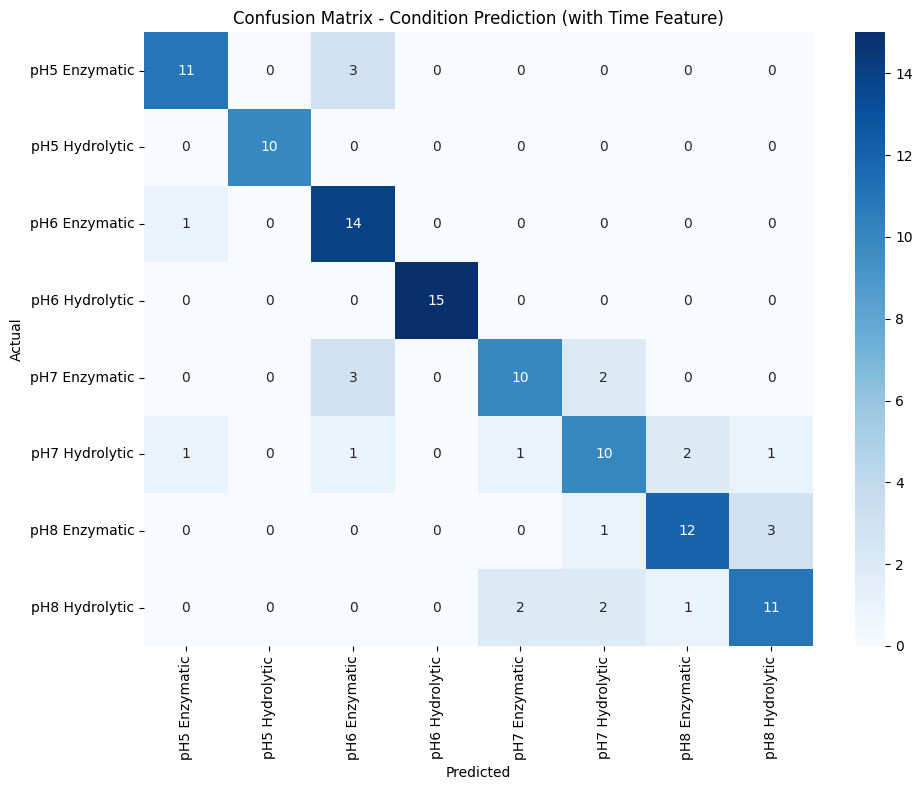

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization
from tensorflow.keras.optimizers import RMSprop

# ---------------------------
# Step 1: Load Images & Labels
# ---------------------------
SIZE = 128
X = []
time_features = []
labels = []

data_dir = "Cropped_Images"

for time_folder in os.listdir(data_dir):
    time_path = os.path.join(data_dir, time_folder)
    if not os.path.isdir(time_path): continue

    try:
        time_val = int(time_folder.split()[0])  # e.g. "0 hr"
    except:
        continue

    for condition_folder in os.listdir(time_path):
        condition_path = os.path.join(time_path, condition_folder)
        if not os.path.isdir(condition_path): continue

        for img_name in os.listdir(condition_path):
            img_path = os.path.join(condition_path, img_name)
            img = cv2.imread(img_path)
            if img is None:
                continue
            img = cv2.resize(img, (SIZE, SIZE))
            img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

            X.append(img)
            time_features.append(time_val)
            labels.append(condition_folder)

X = np.array(X)
time_features = np.array(time_features)
labels = np.array(labels)

# ---------------------------
# Step 2: Preprocessing
# ---------------------------
le = LabelEncoder()
y_encoded = le.fit_transform(labels)

# Split before normalizing!
x_train, x_test, t_train, t_test, y_train, y_test = train_test_split(
    X, time_features, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Normalize
x_train = x_train / 255.0
x_test = x_test / 255.0

# ---------------------------
# Step 3: CNN Feature Extractor
# ---------------------------
feature_extractor = Sequential([
    Conv2D(32, 3, activation='relu', padding='same', input_shape=(SIZE, SIZE, 3)),
    BatchNormalization(),
    Conv2D(32, 3, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(),

    Conv2D(64, 3, activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, 3, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(),

    Flatten()
])

# Extract features from both sets
features_train = feature_extractor.predict(x_train)
features_test = feature_extractor.predict(x_test)

# Concatenate time as feature
features_train_with_time = np.concatenate([features_train, t_train.reshape(-1, 1)], axis=1)
features_test_with_time = np.concatenate([features_test, t_test.reshape(-1, 1)], axis=1)

# ---------------------------
# Step 4: Train RF
# ---------------------------
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(features_train_with_time, y_train)
rf_preds = rf.predict(features_test_with_time)

# ---------------------------
# Step 5: Evaluation
# ---------------------------
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))

cm = confusion_matrix(y_test, rf_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=le.classes_,
            yticklabels=le.classes_,
            cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Condition Prediction (with Time Feature)")
plt.tight_layout()
plt.show()
